# Visualizations

This file contains code used to create some of the data and model visualizations from the article.

This code is in notebook form to make it more readable and interactive.

Some of this code requires the Julia package Interact along with the Jupyter extension WebIO. 

### Packages

In [1]:
# import functions from other scripts
include("1.0_Functions.jl");
include("1.1_Plotting_Functions.jl");

┌ Info: Precompiling ProgressMeter [92933f4c-e287-5a05-a399-4b506db050ca]
└ @ Base loading.jl:1278
┌ Info: Precompiling Colors [5ae59095-9a9b-59fe-a467-6f913c188581]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6048091245598123790\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17131868504201271271\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6048091245598123790\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [12]:
using Distances
using SyntheticNetworks
using LightGraphs
using StatsBase
using GraphPlot
using EmbeddedGraphs
using DelimitedFiles
using Plots; pyplot()
using CSV
using QuasiMonteCarlo
using Tables
using StatsPlots
using Distributions
using DataFrames
using IterativeSolvers
using Statistics
using LsqFit

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall C:\Users\Samuel\.julia\packages\PyCall\BD546\src\PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda C:\Users\Samuel\.julia\packages\Conda\tJJuN\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Samuel\.julia\conda\3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py38_0          14 KB
    freetype-2.10.4            |       hd328e21_0         466 KB
    kiwisolver-1.3.1           |   py38hd77b12b_0          52 KB
    libtiff-4.2.0              |       hd0e1b90_0         786 KB
    lz4-c-1.9.3                |       h2bbff1b_0         131 KB
    matplotlib-3.3.4           |   py38haa95532_0          27 KB
    matplotlib-base-3.3.4      |   py38h49ac443_0         5.1 MB
    olefile-0.46               |             py_0          33 KB
    pillow-8.3.1               |   py38h4fa10fc_0         676 KB
    tk-8.6.10                  |       he774522_0         2.7 MB
    xz-5.2.5                   |       h62dcd

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling QuasiMonteCarlo [8a4e6c94-4038-4cdc-81c3-7e6ffdb2a71b]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling IterativeSolvers [42fd0dbc-a981-5370-80f2-aaf504508153]
└ @ Base loading.jl:1278
┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1278


In [11]:
using Pkg
Pkg.instantiate()

  Installed nghttp2_jll ─────── v1.40.0+2
  Installed Lz4_jll ─────────── v1.9.2+2
  Installed Blosc_jll ───────── v1.14.3+1
  Installed PyPlot ──────────── v2.9.0
  Installed StructTypes ─────── v1.6.0
  Installed PyCall ──────────── v1.92.3
  Installed CategoricalArrays ─ v0.9.5
  Installed Sobol ───────────── v1.5.0
  Installed Compat ──────────── v3.27.0
  Installed LibCURL_jll ─────── v7.70.0+2
  Installed Tables ──────────── v1.4.2
  Installed JLD ─────────────── v0.12.3
  Installed Blosc ───────────── v0.7.0
  Installed Adapt ───────────── v3.3.0
  Installed HDF5_jll ────────── v1.12.0+1
  Installed FileIO ──────────── v1.6.5
  Installed GR_jll ──────────── v0.57.2+0
  Installed StructArrays ────── v0.5.1
  Installed LibSSH2_jll ─────── v1.9.0+3
  Installed HDF5 ────────────── v0.15.4
  Installed StatsBase ───────── v0.33.5
  Installed ColorSchemes ────── v3.12.0
  Installed GR ──────────────── v0.57.3
   Building PyCall → `C:\Users\Samuel\.julia\packages\PyCall\BD546\deps\build

### Simple Plots

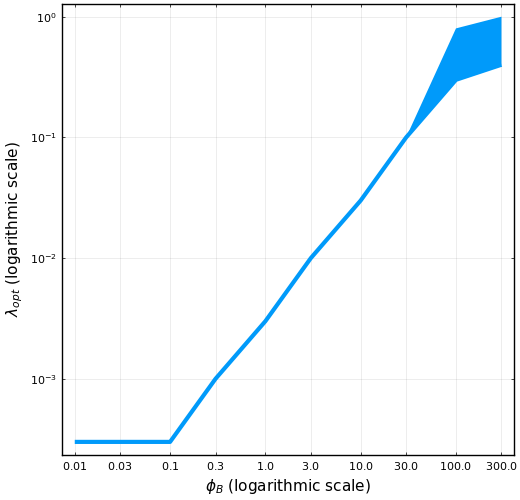

In [10]:
# plot the line (or range) of the optimal battery reliance value depending on the battery budget
# (not used in final article)
bbs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
lower_lambdas = [0.0003, 0.0003, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.4]
upper_lambdas = [0.0003, 0.0003, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.8, 1]

plot(bbs, lower_lambdas, fillrange=upper_lambdas, xscale=:log10, yscale=:log10, linewidth=3,
    legend=false, xticks=(bbs, bbs), xlabel="\$\\phi_B\$ (logarithmic scale)",
    ylabel="\$\\lambda_{opt}\$ (logarithmic scale)", size=(520,500), framestyle=:box)

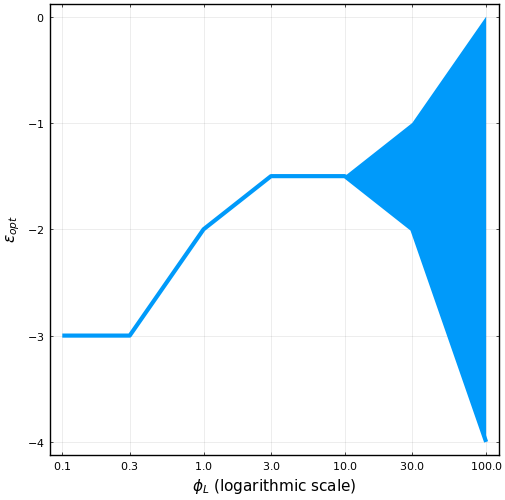

In [14]:
# plot the line (or range) of the optimal line distance exponent value depending on the line budget
# (not used in final article)
lbs = [0.1, 0.3, 1, 3, 10, 30, 100]
lower_epsilons = [-3, -3, -2, -1.5, -1.5, -2, -4]
upper_epsilons = [-3, -3, -2, -1.5, -1.5, -1, 0]

plot(lbs, lower_epsilons, fillrange=upper_epsilons, xscale=:log10, linewidth=3,
    legend=false, xticks=(lbs, lbs), xlabel="\$\\phi_L\$ (logarithmic scale)", ylabel="\$\\varepsilon_{opt}\$",
    size=(505,500), framestyle=:box)

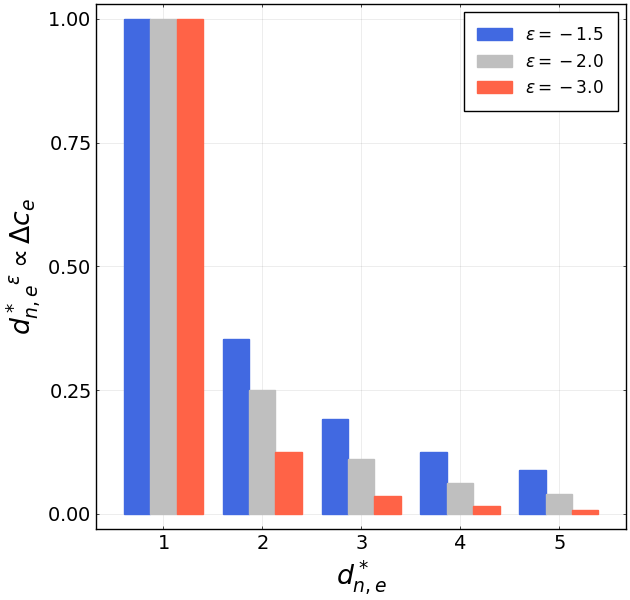

In [18]:
# visualize three different values of the line adaptation parameter epsilon to show the different decay rates
x = collect(1:5)
weight03 = x.^-3
weight1 = x.^-2
weight3 = x.^-1.5

font_fac = 3.5/2

groupedbar([weight3 weight1 weight03], color=[:royalblue :grey75 :tomato], linecolor=[:royalblue :grey75 :tomato],
           label = ["\$\\varepsilon=-1.5\$" "\$\\varepsilon=-2.0\$" "\$\\varepsilon=-3.0\$"],
           xticks=x, size=(630, 600), xlabel= "\$d^*_{n,e}\$", 
           ylabel= "\${d^*_{n,e}}^{\\varepsilon} \\propto \\Delta c_e\$",
           labelfontsize=11*font_fac, tickfontsize=8*font_fac, legendfontsize=7*font_fac, framestyle=:box)

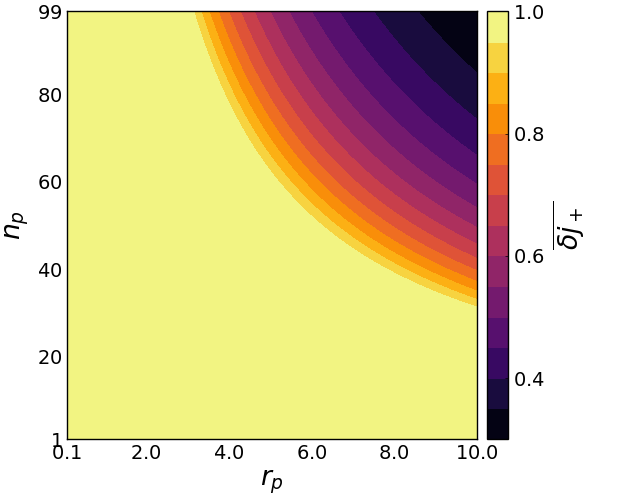

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [20]:
# visualize the fraction of absorbed cumulative power fluctuations for the battery parameter lambda=0.3 which achieves optimal resilience
lambda(r,n) = minimum([0.3*(10/r)*(99/n),1])

font_fac = 3.5/2

contour(collect(0.1:0.1:10), collect(1:99),lambda, fill=true, xticks=[0.1,2,4,6,8,10], yticks=[1,20,40,60,80,99], 
        size=(1270/2, 500), xlabel= "\$r_p\$", ylabel= "\$n_p\$", colorbar_title="\$\\overline{\\delta j_+}\$",
        labelfontsize=11*font_fac, tickfontsize=8*font_fac, colorbar_tickfontsize=8*font_fac,
        colorbar_titlefontsize=11*font_fac, framestyle=:box)

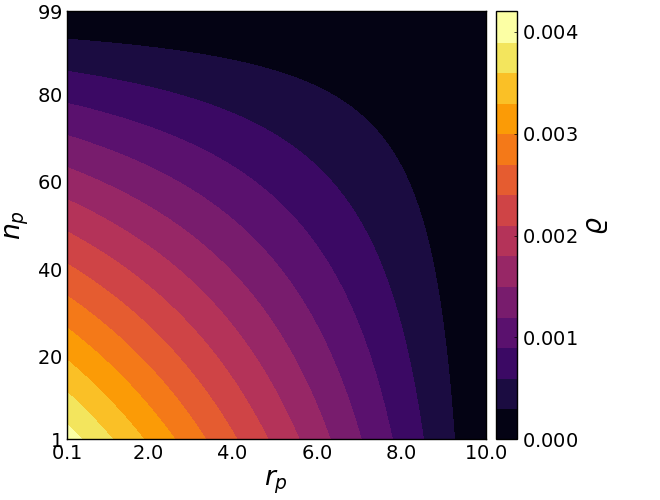

In [23]:
# visualize the probability density of the adverse influence
rho(r,n) = ((10-r)*(100-n))/((9900-4950)*(50-0.995))

font_fac = 3.5/2

contour(collect(0.1:0.1:10), collect(1:99),rho, fill=true, xticks=[0.1,2,4,6,8,10], yticks=[1,20,40,60,80,99], 
        size=(1320/2, 500), xlabel= "\$r_p\$", ylabel= "\$n_p\$", colorbar_title="\$\\varrho\$",
        labelfontsize=11*font_fac, tickfontsize=8*font_fac, colorbar_tickfontsize=8*font_fac,
        colorbar_titlefontsize=11*font_fac, framestyle=:box)

In [23]:
# save the most recent plot as a PDF
savefig("Plots\\$(time()).pdf")

### Power data reading and processing

In [14]:
# normalizing the power consumption data to have a mean of 1
consumption_path = "Data\\consumption"
folder = readdir(consumption_path)
consumption_days = length(folder)
consumption_data = []

for file in folder
    data = open(readdlm,consumption_path*"\\"*file)
    stringy = string.(data[:,2])
    floaty = parse.(Float64,stringy)
    append!(consumption_data,floaty)
end

consumption_data /= mean(consumption_data);

In [15]:
# transforming the data into a dictionary and reducing the resolution to match the solar power supply data

consumer_dict_raw = data2dict(consumption_data,consumption_days)

# original resolution 2s, goal resolution 60s
# => merging 30 2-second timesteps into one 60-second-timestep
consumer_dict_default = smoother(consumer_dict_raw,30);

In [16]:
# normalizing the solar power supply data to have a mean of 1
solar_path = "Data\\solar"
folder = readdir(solar_path)
solar_days = length(folder)
solar_data = []

for file in folder
    data = open(readdlm,solar_path*"\\"*file)
    stringy = string.(data[:,2])
    floaty = parse.(Float64,stringy)
    append!(solar_data,floaty)
end

solar_data /= mean(solar_data);

In [17]:
# transforming the data into a dictionary

solar_dict_default = data2dict(solar_data,solar_days);

In [18]:
include("1.0_Functions.jl");
include("1.1_Plotting_Functions.jl");

solar_dict = smoother(solar_dict_default,1)
consumer_dict = smoother(consumer_dict_default,1)
limit_finder(10, 80, 0.001)

rp: 10
np: 80
reliance: 0.001
j_mean: 9
goal_frac: 0.0012375
upper_limit: 102.85862794992988
lower_limit: -2.4253639665893507



lower_upper_struct(-2.4253639665893507, 102.85862794992988)

### Power consumption

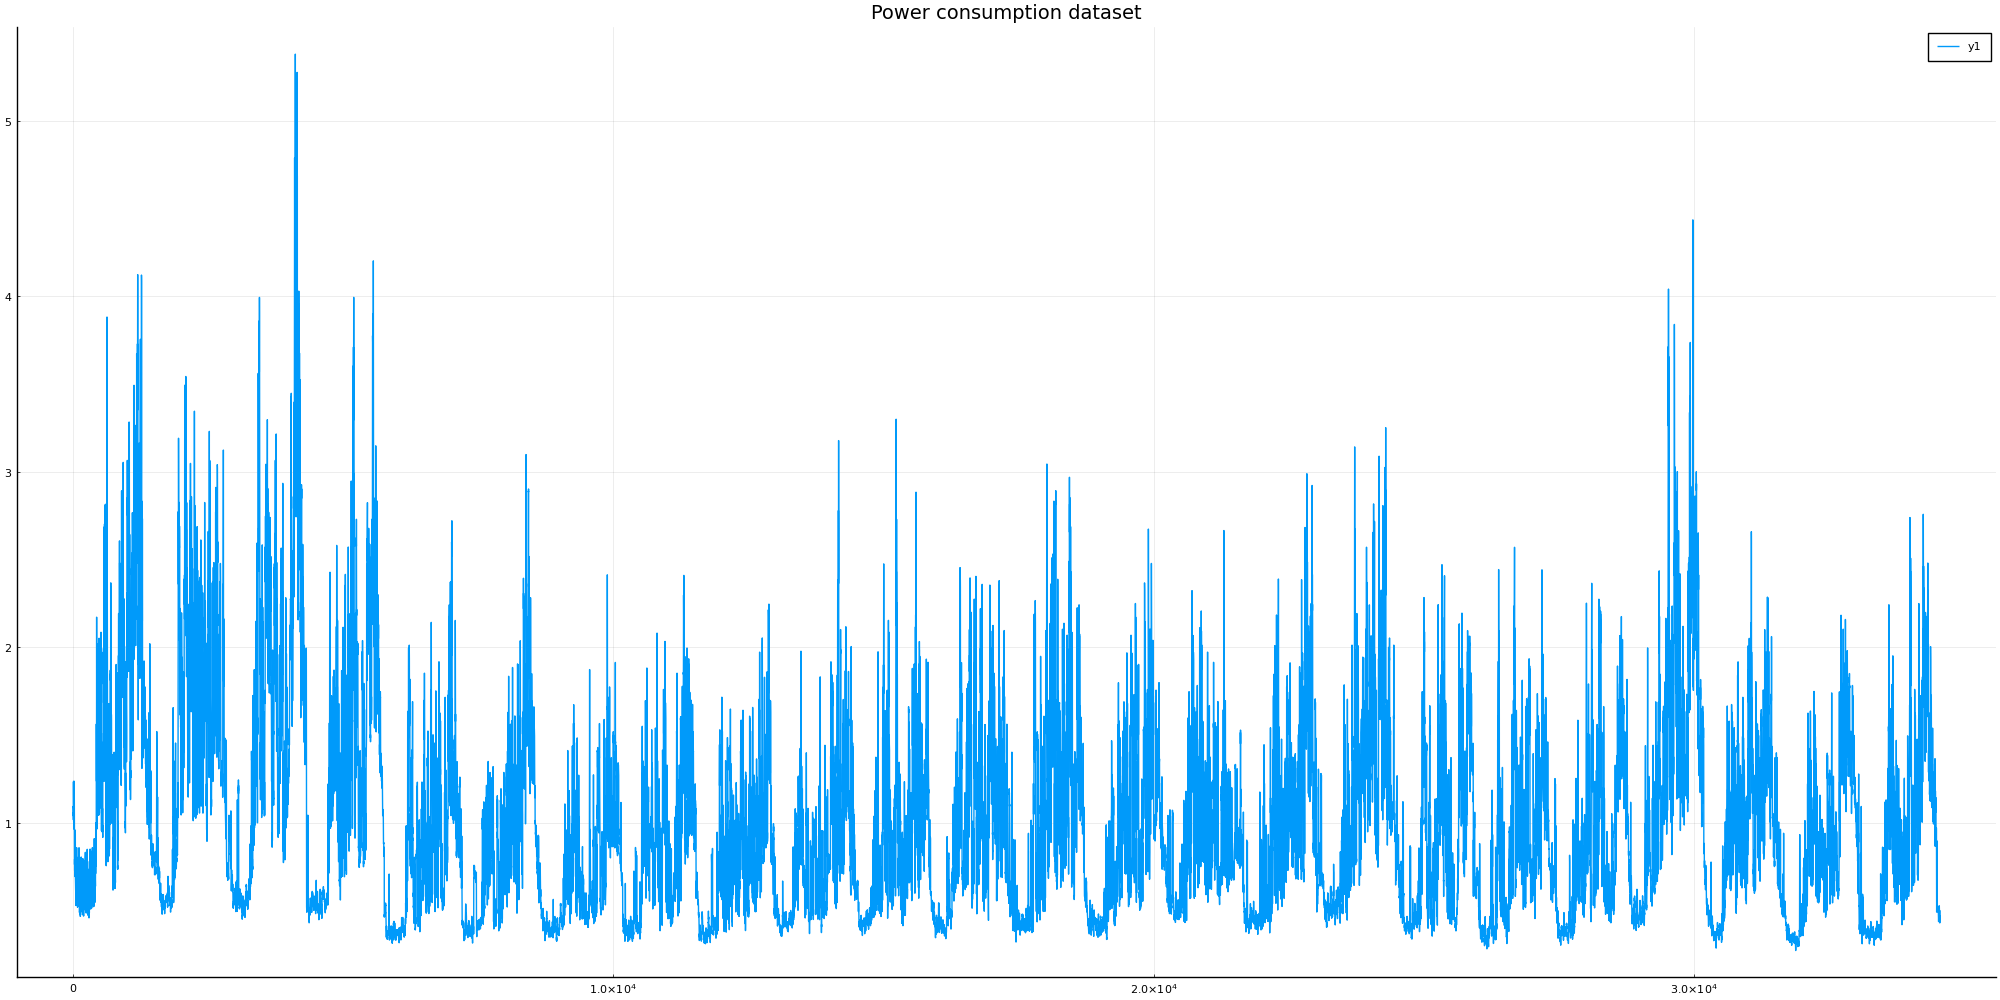

In [9]:
# plot a concatenation of all power consumption daily chunks 
plot(merger(consumption_data,30),size=(2000,1000), title = "Power consumption dataset")

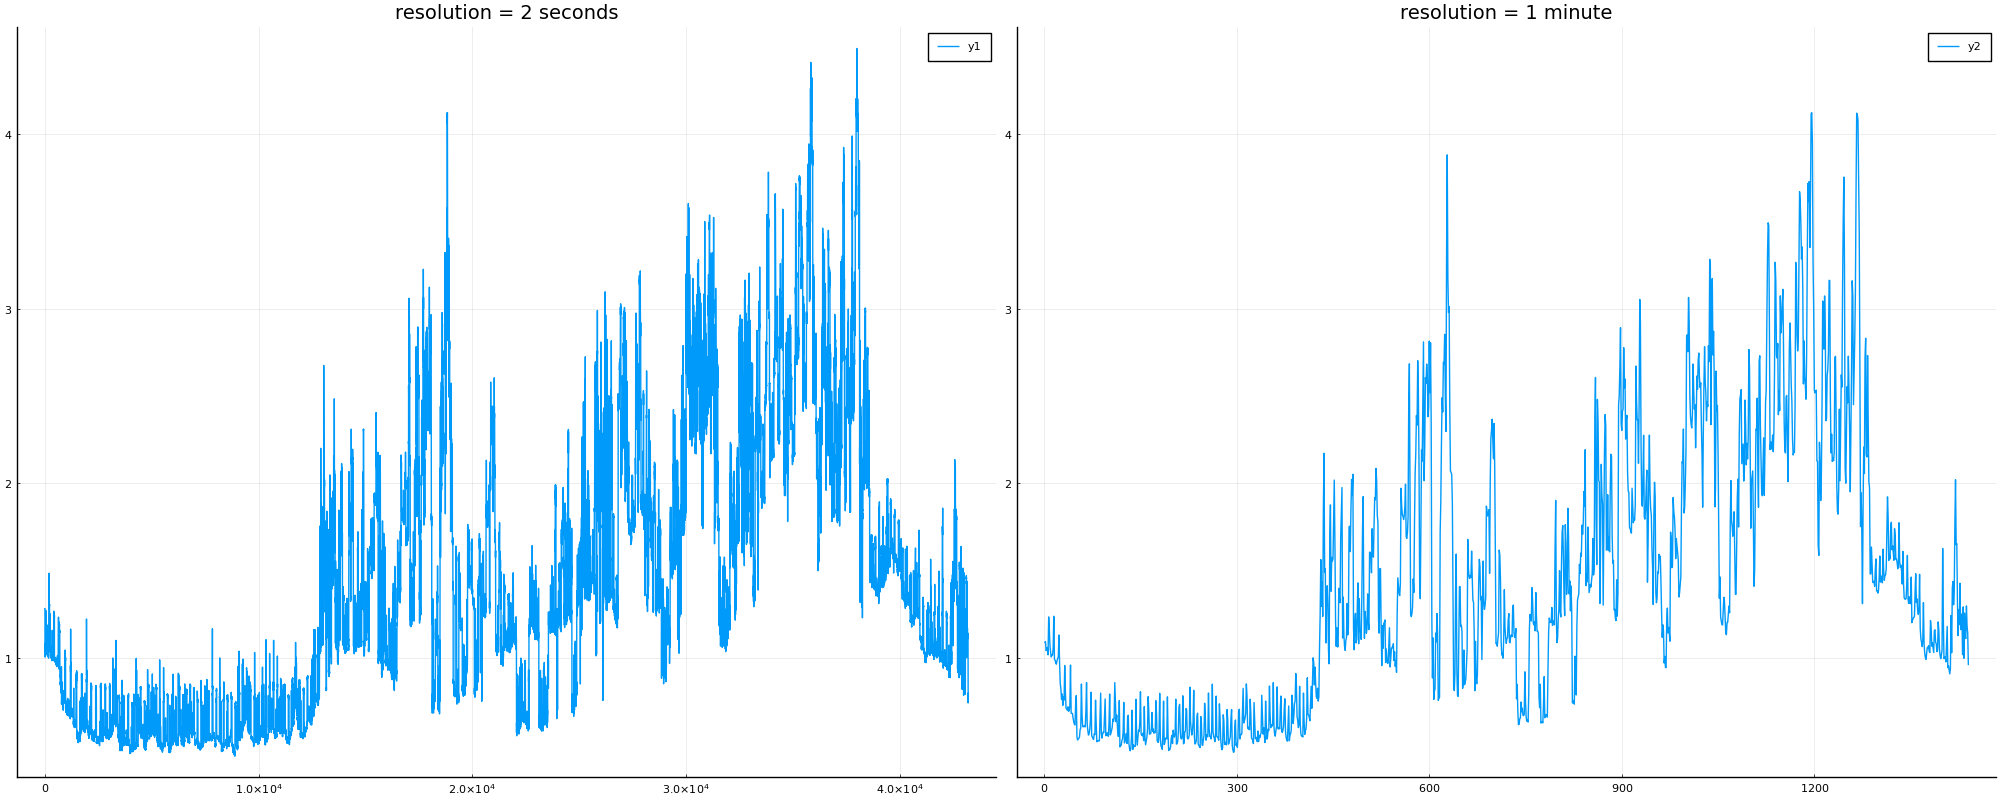

In [10]:
# plot a single daily chunk of power consumption data in its original and reduced resolution
day = 1
plot( [consumer_dict_raw[day],consumer_dict_default[day]] , layout=2, size=(2000,800),
       ylim=[minimum(consumer_dict_raw[day]),maximum(consumer_dict_raw[day])] , title = ["resolution = 2 seconds" "resolution = 1 minute"])

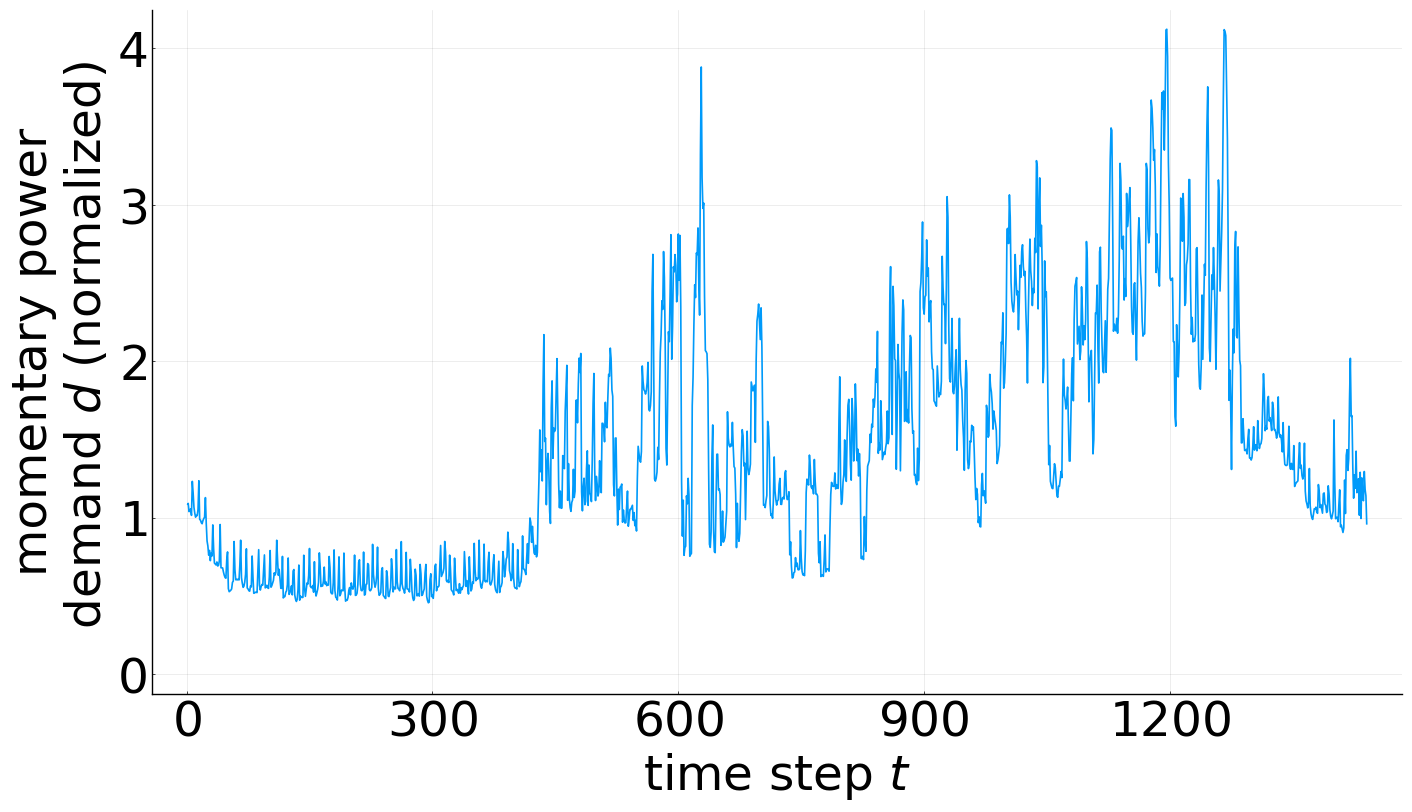

In [11]:
# plot an exemplary daily chunk of power consumption data from winter
day2 = 1
siz=35
plot( consumer_dict_default[day2] , size=(1400,800),
      ylim=[0,maximum(consumer_dict_default[day2])],
      ylabel="momentary power\n demand \$d\$ (normalized)", xlabel="time step \$t\$",
      ytickfontsize=siz, xtickfontsize=siz, xguidefontsize=siz, yguidefontsize=siz,leg=false, linewidth=1.2)
savefig("Plots/consumption_winter.png")

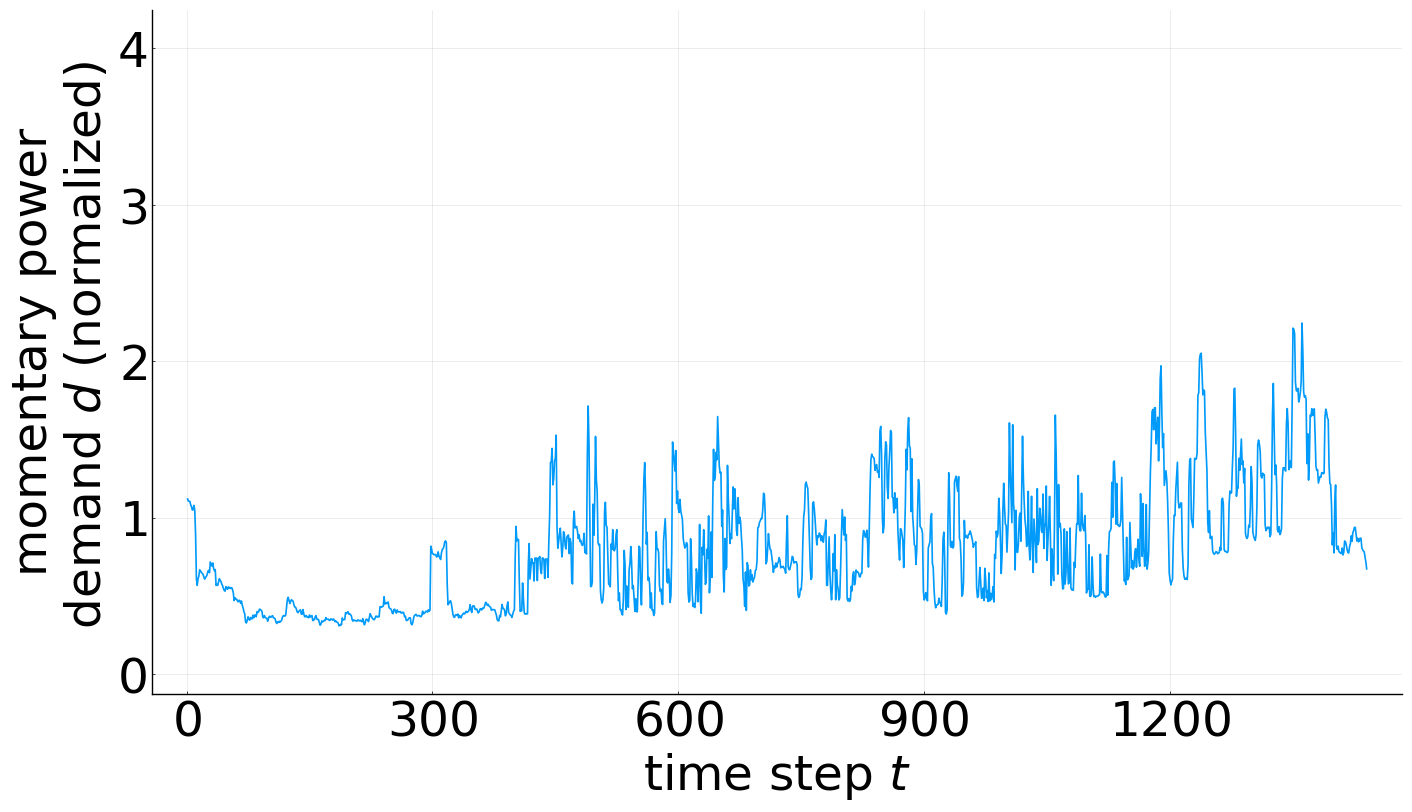

In [12]:
# plot an exemplary daily chunk of power consumption data from summer
day1 = 9
plot( consumer_dict_default[day1] , size=(1400,800),
      ylim=[0,maximum(consumer_dict_default[day2])],
      ylabel="momentary power\n demand \$d\$ (normalized)", xlabel="time step \$t\$",
      ytickfontsize=siz, xtickfontsize=siz, xguidefontsize=siz, yguidefontsize=siz,leg=false, linewidth=1.2)
savefig("Plots/consumption_summer.png")

### Solar power generation

In [13]:
# plot a concatenation of all power supply daily chunks 
plot(solar_data,size=(2000,1000), title = "Solar power dataset");

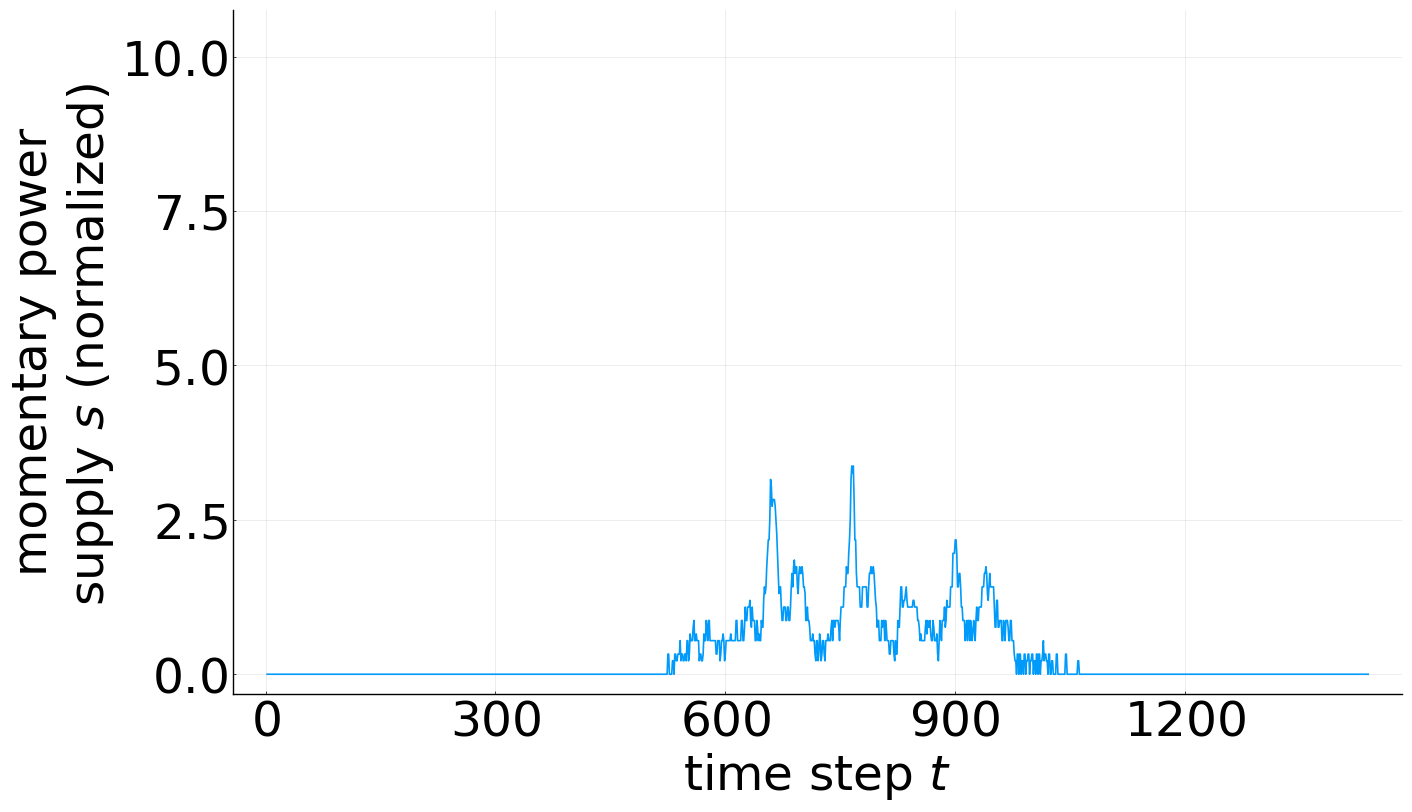

In [15]:
# plot an exemplary daily chunk of power supply data from winter
day2 = 20
plot( solar_dict_default[day2] , size=(1400,800),
      ylim=[minimum(solar_dict_default[day1]),maximum(solar_dict_default[day1])],
      ylabel="momentary power\n supply \$s\$ (normalized)", xlabel="time step \$t\$",
      ytickfontsize=siz, xtickfontsize=siz, xguidefontsize=siz, yguidefontsize=siz,leg=false, linewidth=1.2)
savefig("Plots/solar_winter.png")

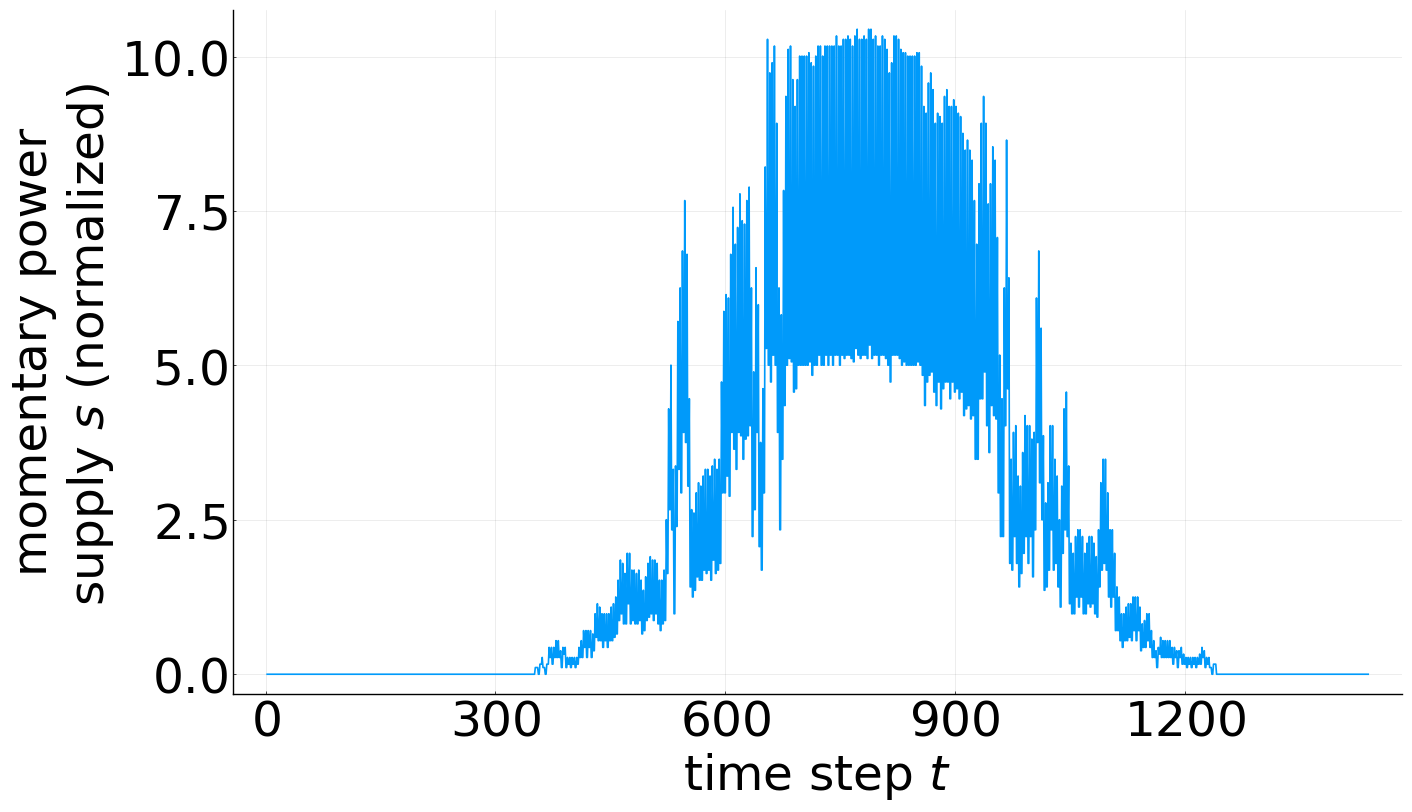

In [14]:
# plot an exemplary daily chunk of power supply data from summer
day1 = 13
plot( solar_dict_default[day1] , size=(1400,800),
      ylim=[minimum(solar_dict_default[day1]),maximum(solar_dict_default[day1])],
      ylabel="momentary power\n supply \$s\$ (normalized)", xlabel="time step \$t\$",
      ytickfontsize=siz, xtickfontsize=siz, xguidefontsize=siz, yguidefontsize=siz,leg=false, linewidth=1.2)
savefig("Plots/solar_summer.png")

### Power Visualization

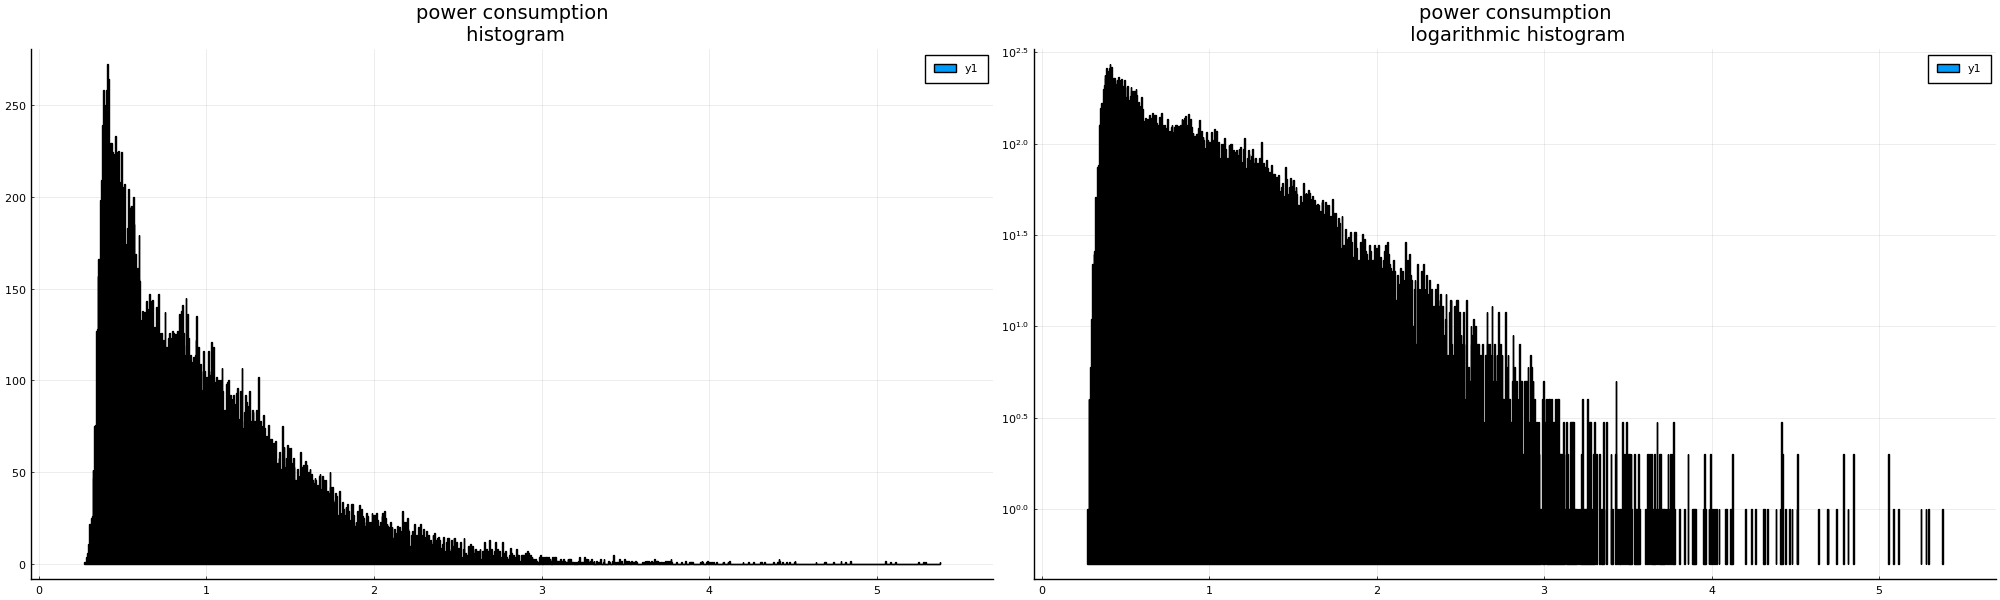

In [16]:
# plot a linear and a logarithmic histogram of all possible power consumption values
chist = dict_hist(consumer_dict_default)
h = histogram(chist, nbins=1000, title="power consumption\n histogram")
logh = histogram(chist, nbins=1000, yaxis =:log, title="power consumption\n logarithmic histogram")
plot(h,logh, size=(2000,600))

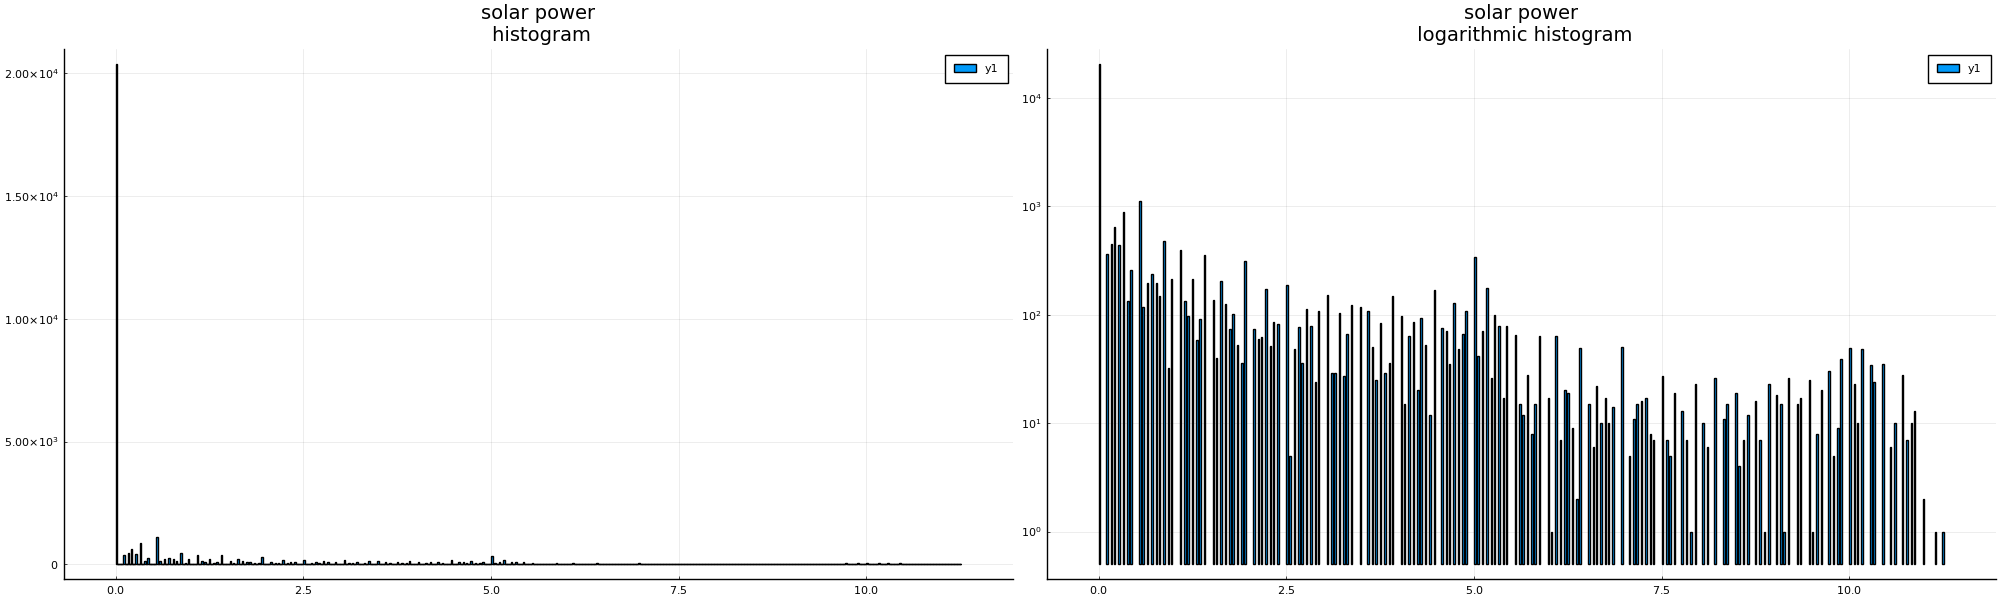

In [17]:
# plot a linear and a logarithmic histogram of all possible power supply values
shist = dict_hist(solar_dict_default)
h = histogram(shist, nbins=1000, title="solar power\n histogram")
logh = histogram(shist, nbins=1000, yaxis =:log, title="solar power\n logarithmic histogram")
plot(h,logh, size=(2000,600))

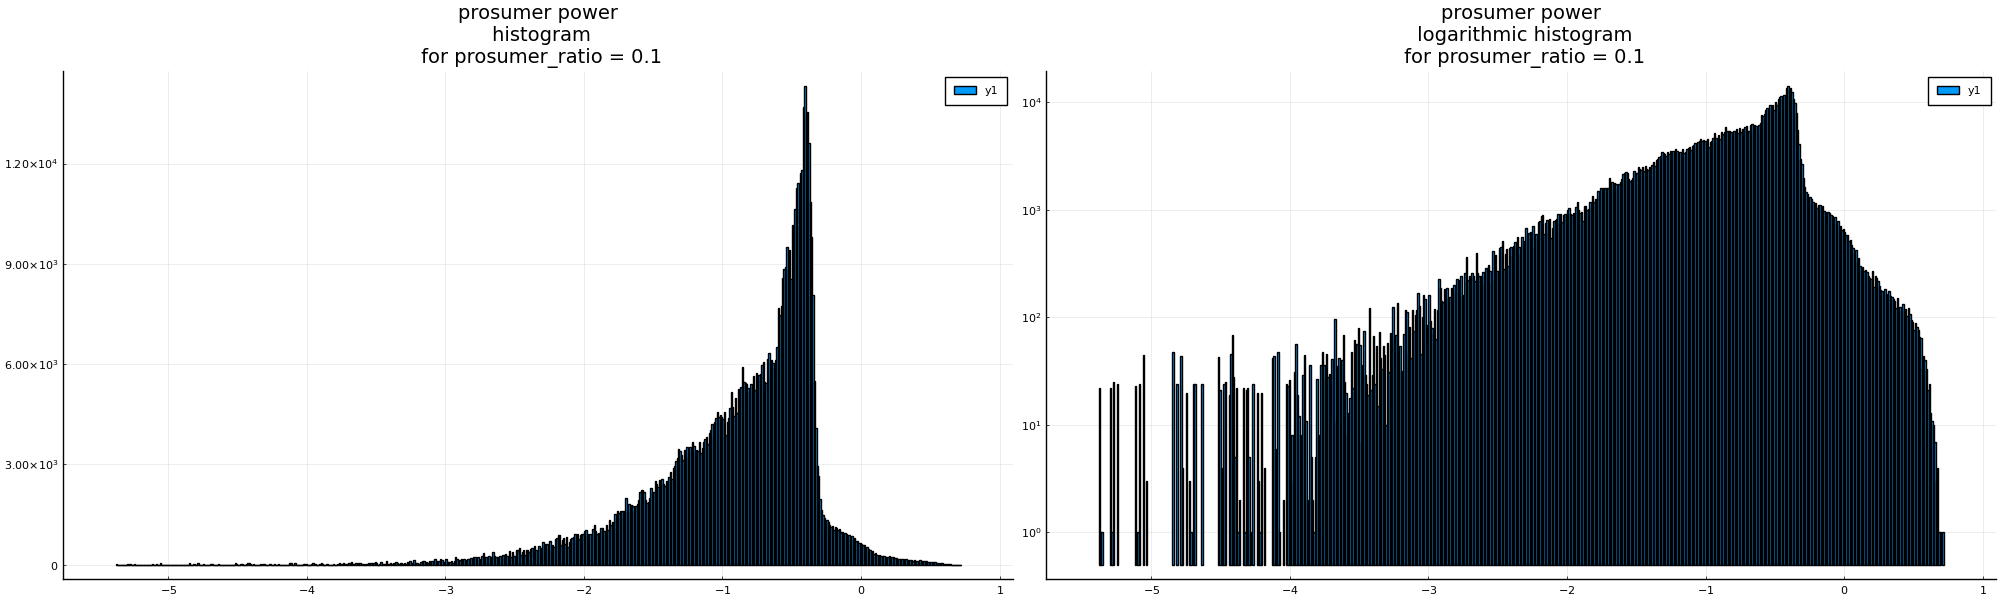

In [18]:
# plot a linear and a logarithmic histogram of all possible power injection values based on a mean supply-to-consumption ratio of 0.1
schist = combo_hist(consumer_dict_default, solar_dict_default, ratio=0.1)
r = string(schist.ratio)
h = histogram(schist.list, nbins=1000, title="prosumer power\n histogram\n for prosumer_ratio = "*r)
logh = histogram(schist.list, nbins=1000, yaxis =:log,
                 title="prosumer power\n logarithmic histogram\n for prosumer_ratio = "*r)
plot(h,logh, size=(2000,600))

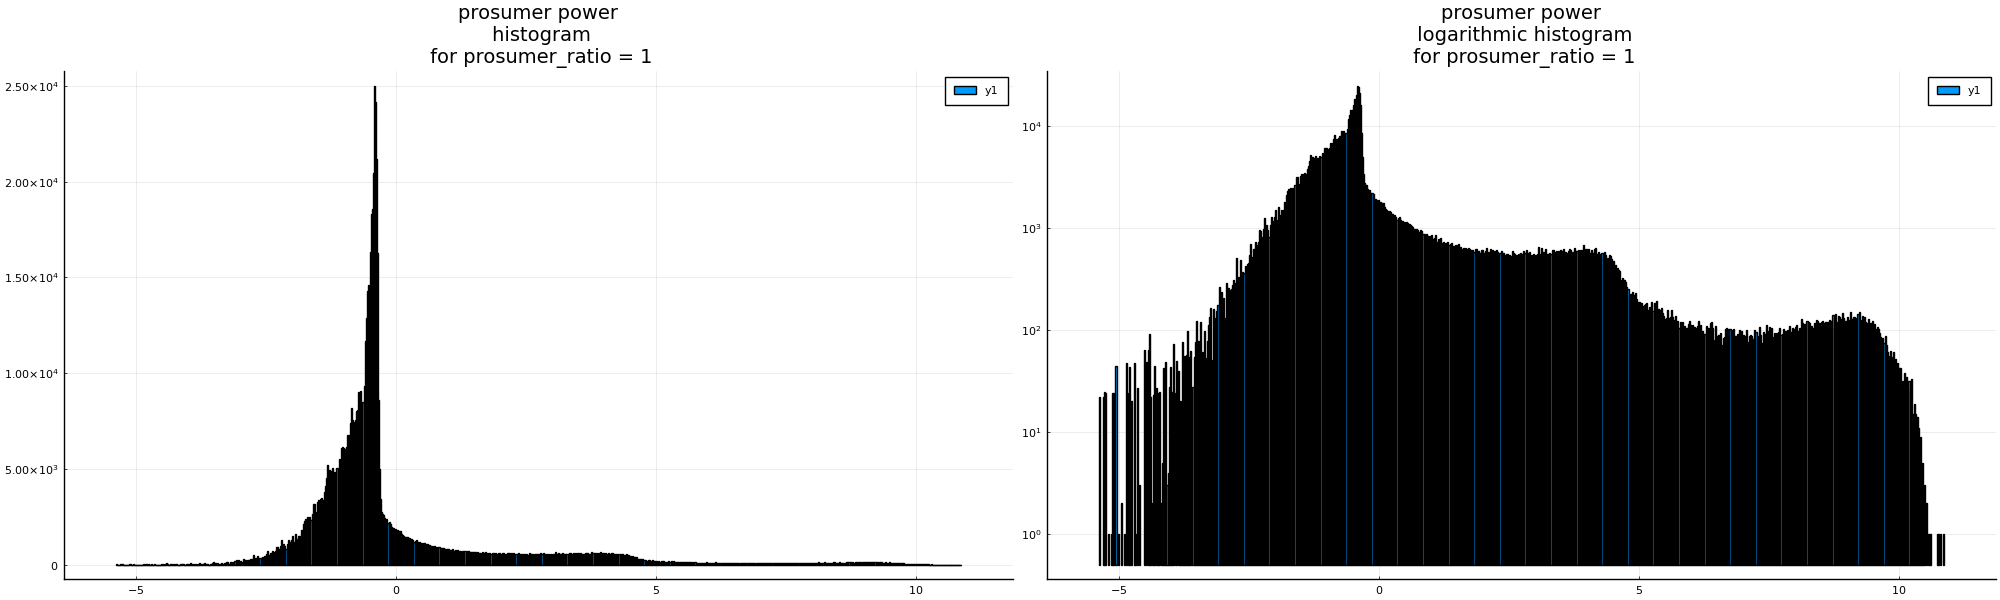

In [19]:
# plot a linear and a logarithmic histogram of all possible power injection values based on a mean supply-to-consumption ratio of 1
schist = combo_hist(consumer_dict_default, solar_dict_default, ratio=1)
r = string(schist.ratio)
h = histogram(schist.list, nbins=1000, title="prosumer power\n histogram\n for prosumer_ratio = "*r)
logh = histogram(schist.list, nbins=1000, yaxis =:log,
                 title="prosumer power\n logarithmic histogram\n for prosumer_ratio = "*r)
plot(h,logh, size=(2000,600))

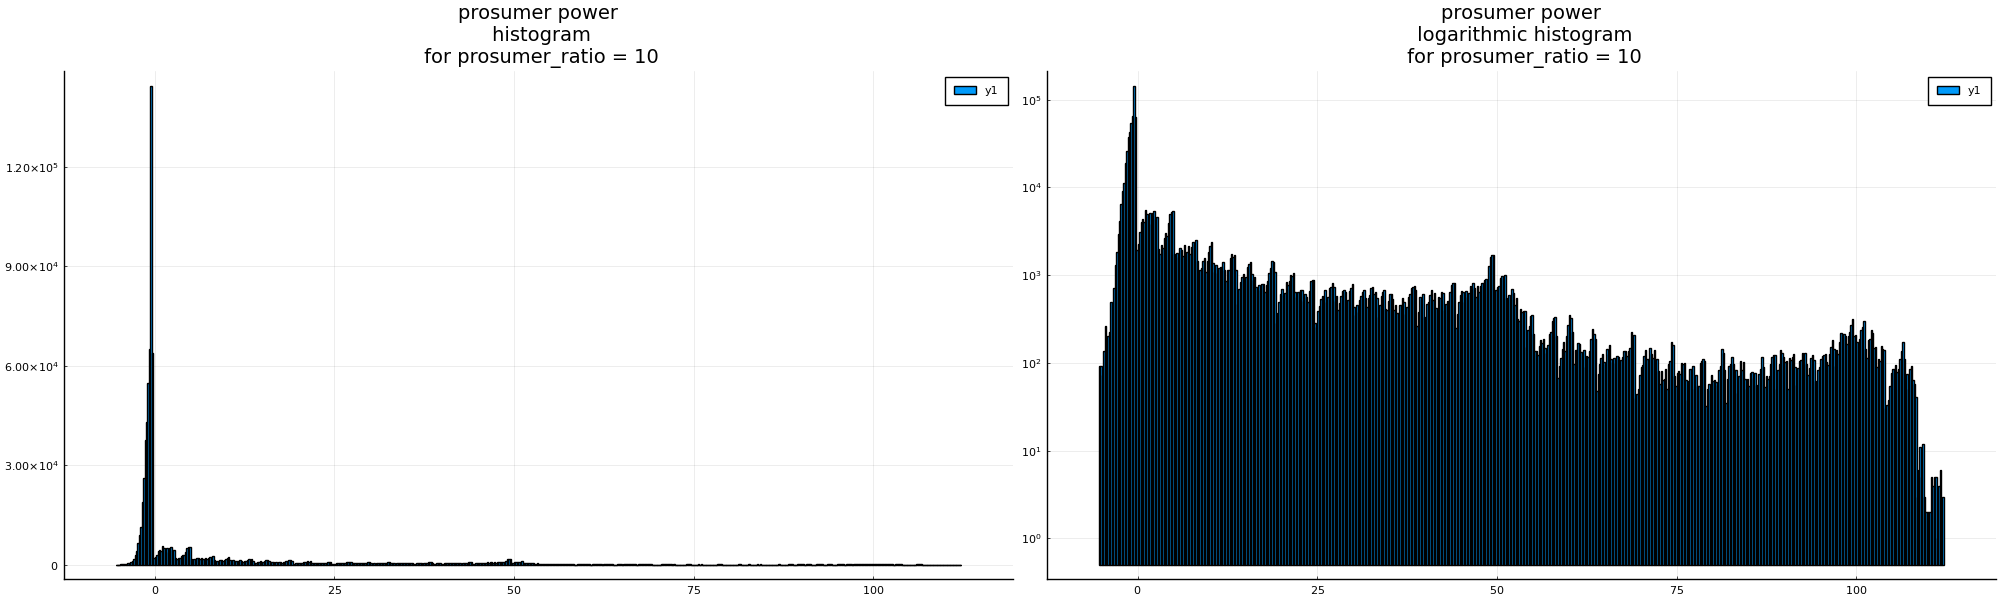

In [20]:
# plot a linear and a logarithmic histogram of all possible power injection values based on a mean supply-to-consumption ratio of 10
schist = combo_hist(consumer_dict_default, solar_dict_default, ratio=10)
r = string(schist.ratio)
h = histogram(schist.list, nbins=1000, title="prosumer power\n histogram\n for prosumer_ratio = "*r)
logh = histogram(schist.list, nbins=1000, yaxis =:log,
                 title="prosumer power\n logarithmic histogram\n for prosumer_ratio = "*r)
plot(h,logh, size=(2000,600))

In [19]:
# calculate the limits of supply-demand mismatch that batteries should absorb based on an exemplary mean cumulative excess of 0.5
full = combo_hist(consumer_dict_default, solar_dict_default, ratio=1).list
lims = limit_finder(1, 99, 0.05; solar_dict, consumer_dict);

left = filter(x -> x<lims.lower, full)
middle = filter(x -> lims.lower<=x<=lims.upper, full)
right = filter(x -> x>lims.upper, full)
append!(middle, [middle[end]+0.1]);

rp: 1
np: 99
reliance: 0.05
j_mean: 0
goal_frac: 0.5
upper_limit: 1.868733571770734
lower_limit: -0.47084318080338794



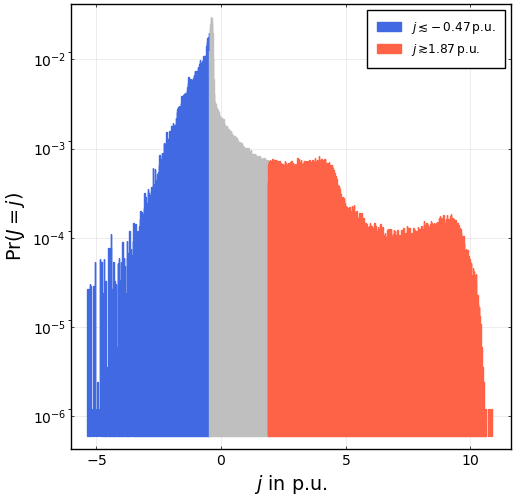

In [22]:
# visualize the limits in a histogram
nbins = 1000

len = length(full)
span = Int(floor(full[end]-full[1])) 
lbins = Int(floor((left[end]-left[1])/span*nbins))
mbins = Int(floor((middle[end]-middle[1])/span*nbins))
rbins = Int(floor((right[end]-right[1])/span*nbins))

histogram(left, fillcolor=:royalblue, nbins=lbins, linecolor=:royalblue, yscale=:log10, label="\$j \\, \\lesssim -0.47\\,\$p.u.")
histogram!(middle, fillcolor=:grey75, nbins=mbins, linecolor=:grey75, yscale=:log10, label=:none)
histogram!(right, fillcolor=:tomato, nbins=rbins, linecolor=:tomato, yscale=:log10, label="\$j \\, \\gtrsim 1.87\\,\$p.u.")

font_fac=2.5/2

ticklabels = [10^-6, 10^-5, 10^-4, 10^-3, 10^-2,]
ticks = len.*ticklabels
tickstrings = ["10^{-6}", "10^{-5}", "10^{-4}", "10^{-3}", "10^{-2}"]
plot!(legend =:topright, size=(1030/2,500), framestyle=:box,
      yticks=(ticks, tickstrings), xlabel="\$j\$ in p.u.", ylabel="Pr\$(J=j)\$", ytick_direction=:none,
      labelfontsize=11*font_fac, legendfontsize=7*font_fac, tickfontsize=8*font_fac)

In [23]:
# save the most recent plot as a PDF
savefig("Plots\\$(time()).pdf")

In [22]:
# vary r_p and calculate the sum of injections that are positive (cumulative excess)
rps = collect(0.1:0.01:10)

cum_ex = 0*rps
for i in 1:length(rps)
    list = combo_hist(consumer_dict_default, solar_dict_default, ratio=rps[i]).list .- (rps[i]-1)
    cum_ex[i] = sum(filter(x -> x>0, list))
end

[561275.8187074895, 0.19784645299624665]


┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots C:\Users\Samuel\.julia\packages\Plots\SVksJ\src\args.jl:1253
┌ Warning: scale log is unsupported with Plots.PyPlotBackend().  Choose from: [:identity, :ln, :log2, :log10]
└ @ Plots C:\Users\Samuel\.julia\packages\Plots\SVksJ\src\args.jl:1253


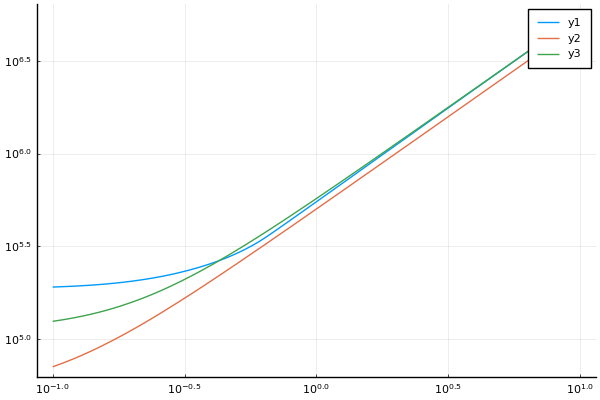

In [43]:
# try to fit the curve using nonlinear least squares (not included in final article)
@. model(x,p) = p[1]*sqrt(p[2]^2+x^2)  #p[1]*x + p[2]*(x-p[3])^p[4]  + p[5]

#initial guess for parameters
p0 =  [500000,0.1]       #[550000, 200000, -1, -5, 0]

p = curve_fit(model, rps, cum_ex, Float64.(p0)).param
println(p)

    
plot(rps, cum_ex, xscale =:log, yscale = :log)
plot!(rps, model(rps,p0))
plot!(rps, model(rps,p))

### Power grids

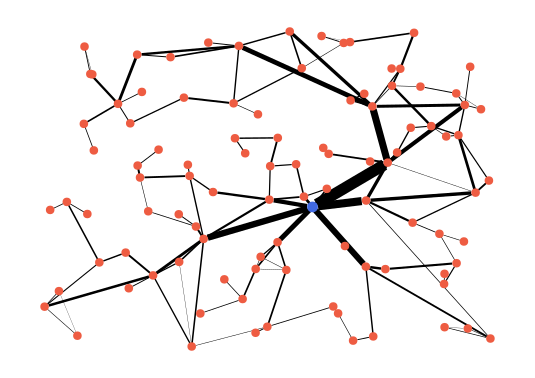

In [672]:
# generate and plot a random power grid graph
ep = example_plot(100, 15, 0.15, 0.15, 0.2; reps=100, size=3)
using Cairo, Compose
ep

In [673]:
# export graph plot as PDF
draw(PDF("Plots\\grid_example$(time()).pdf", 200, 200), ep)

In [11]:
# calulate power grid graph statistics
grid_specs(100, 15, 0.15, 0.15, 0.2, reps=100)

### Quasi Monte Carlo Sampling: Sobol Algorithm (not included in final article)

In [ ]:
# plot Sobol samples in 2D with interactive number of samples
@manipulate for s in 2 .^[2,4,6,8,10,12]
    ms = 5
    samples = Array{Any}(QuasiMonteCarlo.sample(s, [0.5,1],[10.,99.5],SobolSample()))
    samples[2,:] = Int.(round.(samples[2,:]))
    scatter(samples[1,:],samples[2,:],leg=false,markersize=ms,markercolor=nothing)
end

In [ ]:
# plot two sets of 256 samples, one from uniform random sampling, on from the Sobol algorithm
rs = [rand(256),rand(256)]
ss = Array{Any}(QuasiMonteCarlo.sample(256,[0,0],[1,1],SobolSample()))

mc = collect(1:256)

fm(x) = 7.5+22.5*(1/10000)^x
ms = [fm(i) for i in collect(range(0,1,length=256))]

cmap=cgrad(:linear_bgy_10_95_c74_n256, rev=true)

rp = plot()
for i in 1:256
    rp = scatter!((rs[1][i],rs[2][i]),markersize=ms[i], marker_z=mc[i], color=cmap, colorbar=:right,
                  right_margin=5*mm, markerstrokecolor=:gray)
end

sp = plot()
for i in 1:256
    sp = scatter!((ss[1,i],ss[2,i]),markersize=ms[i], marker_z=mc[i], color=cmap, colorbar=false,
                  markerstrokecolor=:grey)
end

siz = 30

plot(rp, sp, layout=2, size=(2000,900),leg=false, xticks=false, yticks=false,
     ytickfontsize=siz, xtickfontsize=siz, xguidefontsize=siz, yguidefontsize=siz,framestyle=:box)

In [ ]:
# combine and export the two plots
sizzle = (2240,1700).*0.66
fs = 20
plot(size=sizzle,
     xlabel="production-to-consumption ratio \$r_p\$", ylabel="number of appearing prosumers \$n_p\$",
     legend=false, labelfontsize=fs, legendfontsize=fs, ticks=false, draw_arrow=true)
#,framestyle=:box)